#### **Recurrent Neural Networks (RNN**)

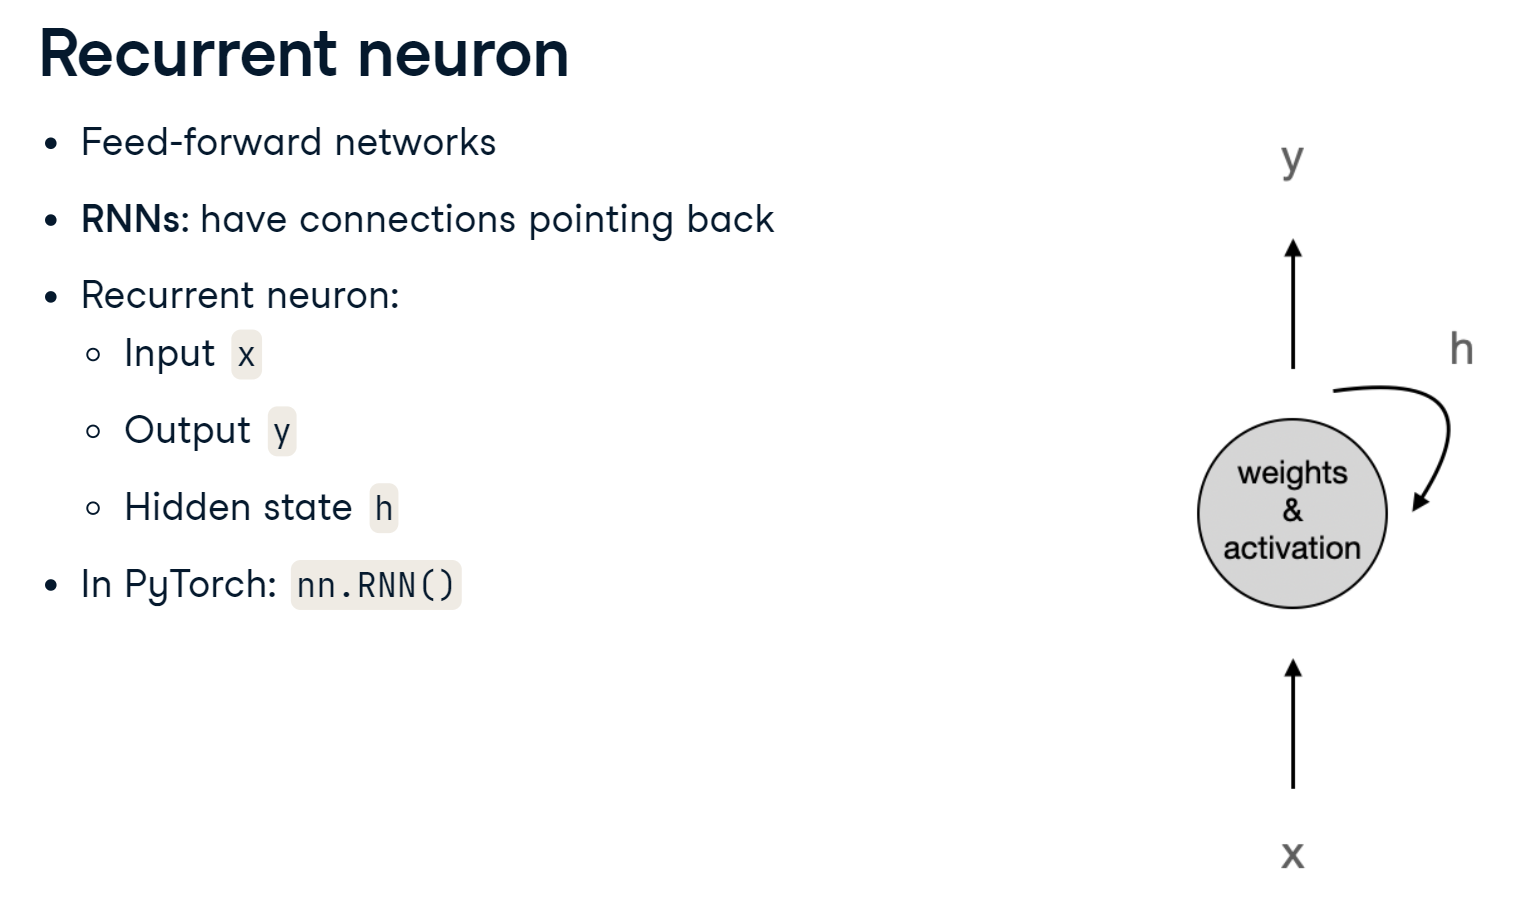

In [ ]:
# to use rnn in torch, we use the following command -
import torch.nn as nn

nn.RNN()

#### There are 4 different types of rnn architectures -

- Sequence to sequence architecture 
  - Pass sequence as input and make use of the entire output sequence
  - e.g. Real-time speech recognition

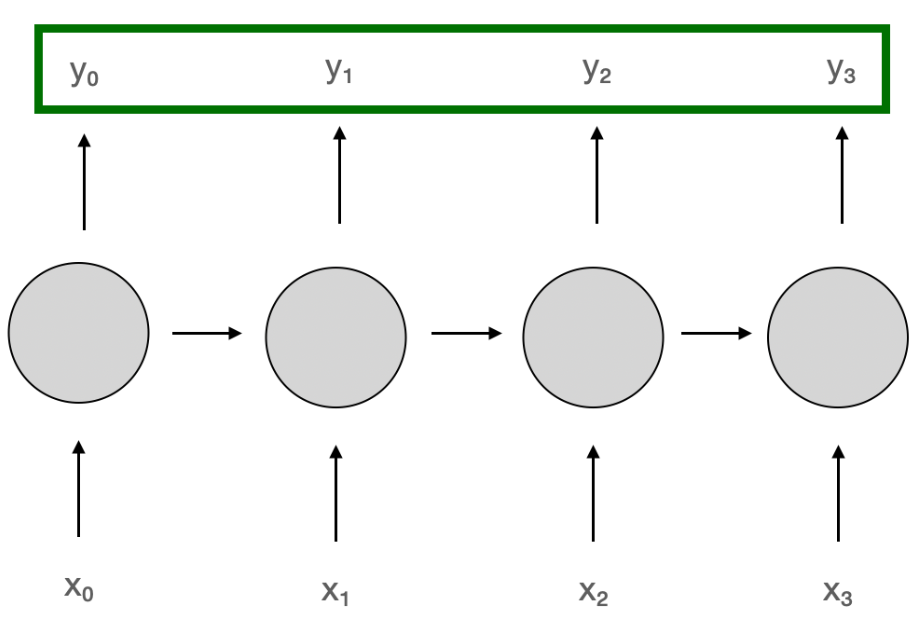

- Sequence to vector architecture
  - pass sequence as input and use only the last ouptut, ignoring all previous outputs.
  - i.e. the model goes through the entire input sequence before producing an output.
  - e.g. Text topic classification (read whole text before deciding it's topic)
  - e.g. electricity consumption prediction

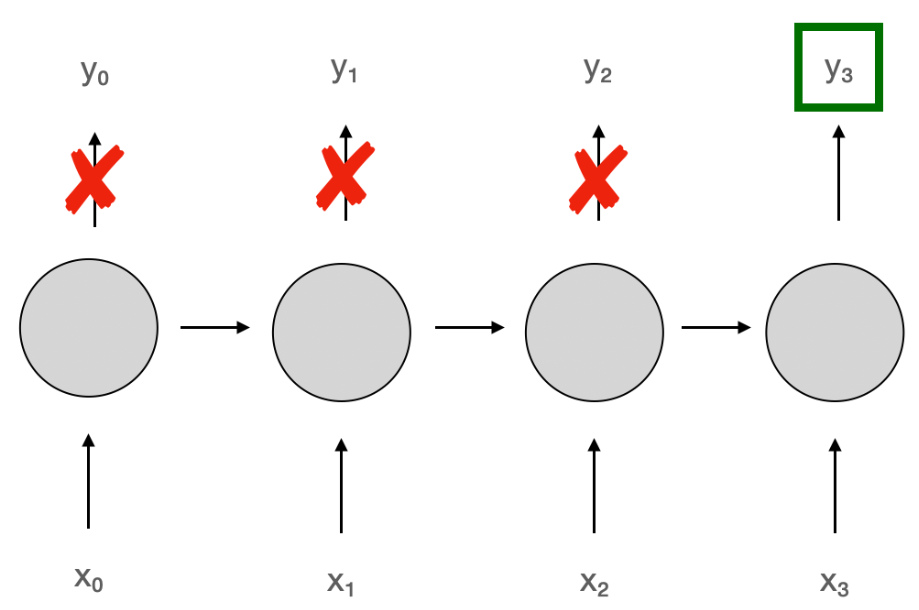

- Vector to sequence architecture
  - Pass single input to generate the entire output sequence.
  - we pass single input and replace all other inputs with zeroes.
  - e.g. text generation (given a vector of topic, style or sentiments, the model can generate entire text)

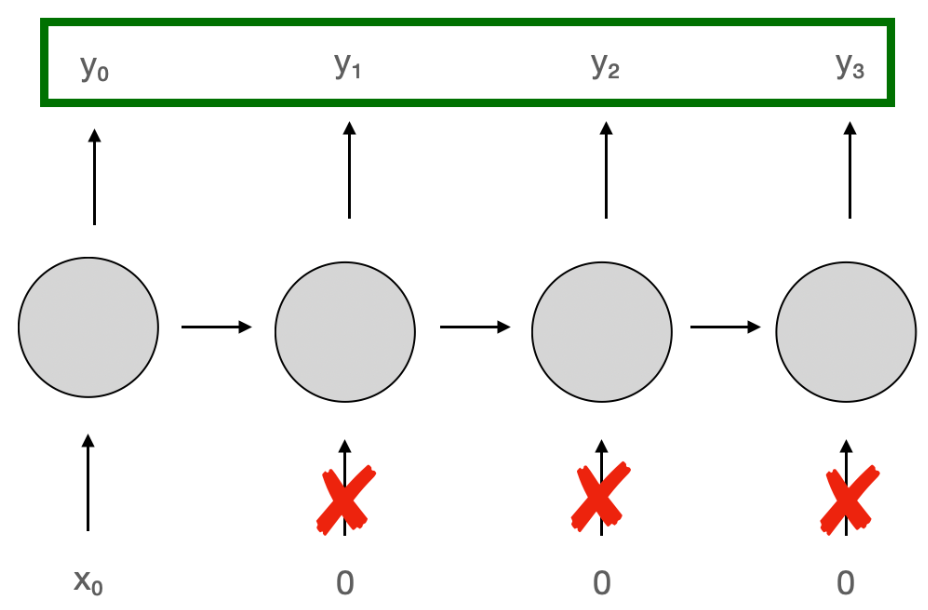

- Encoder - Decoder architecture
  - pass entire input sequence and only then start using the output sequence
  - the model stops receiving input and only then starts generating outputs. 
  -  e.g. machine translation (word by word translation is not possible. translation can only take place when the entire text is recieved)

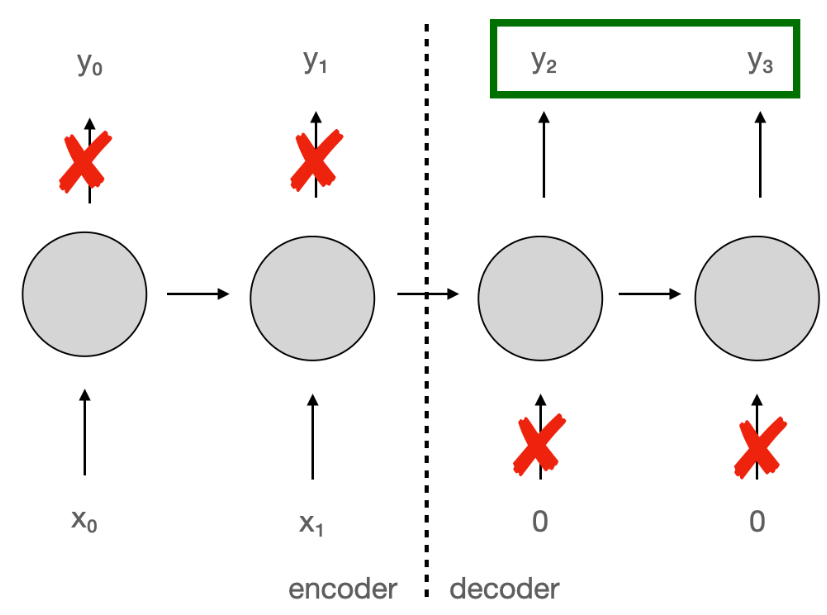

In [ ]:
# example RNN in python
import torch
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.rnn = nn.RNN(input_size=1,
                          hidden_size=32,
                          num_layers=2,
                          batch_first=True
        )
        self.fc = nn.Linear(32, 1)
    
    def forward(self, x):
        h0 = torch.zeros(2, x.size(0), 32)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out

#### **Training & Evaluating RNNs**

**Choosing correct loss**
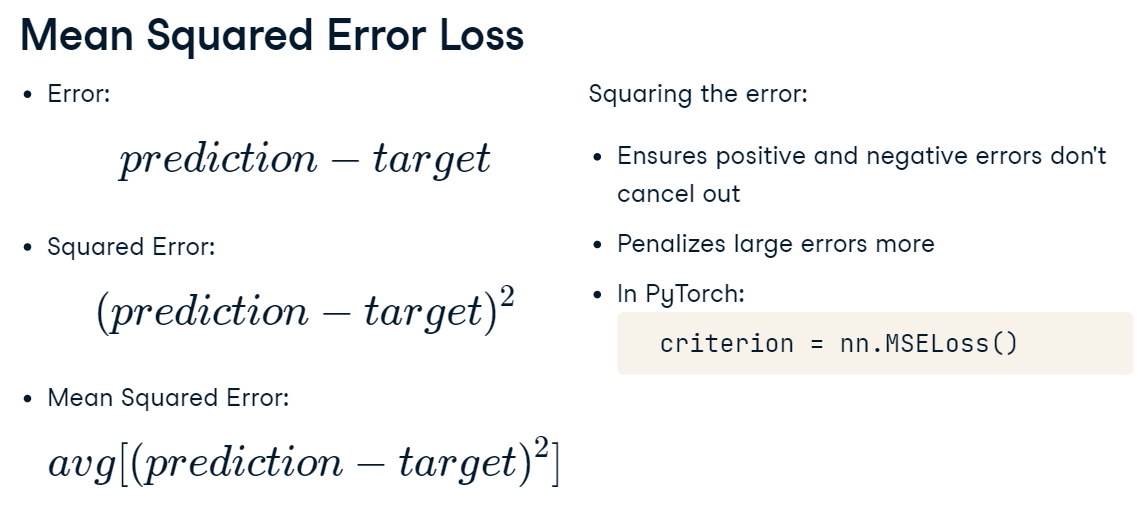

##### **Expanding & Squeezing Tensors**

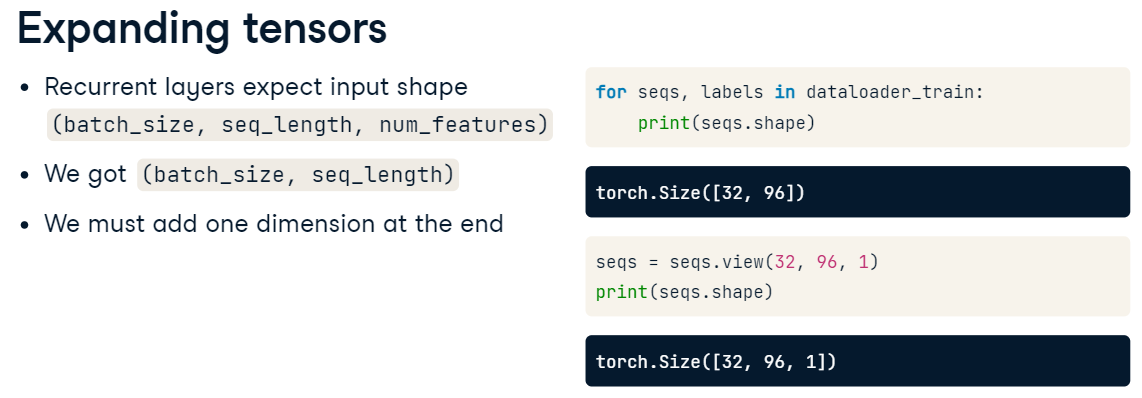

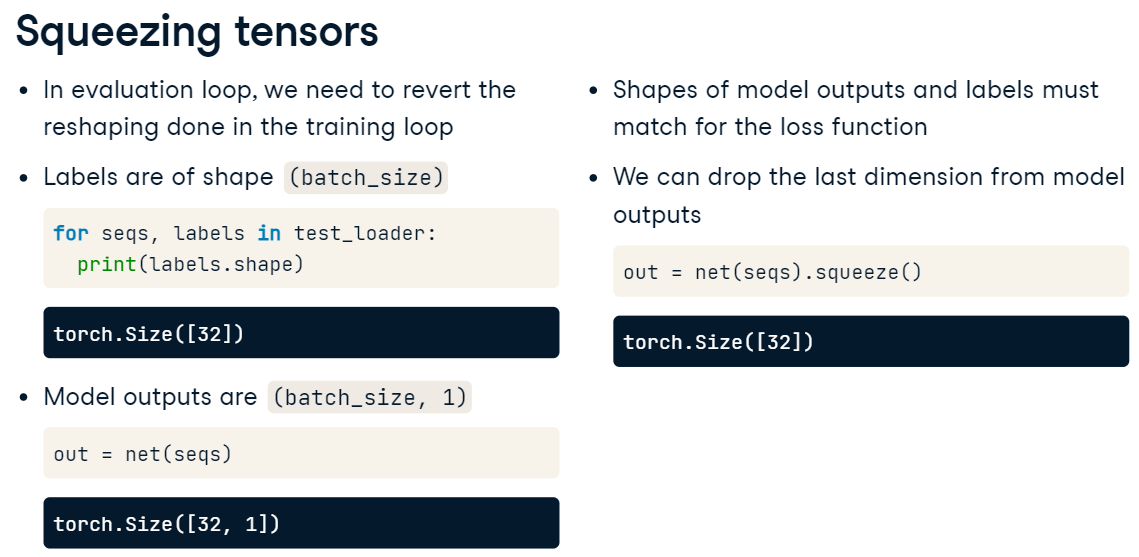

##### **Training Loop**

In [ ]:
import torch.nn as nn
import torch.optim as optim

net = Net()
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr = 0.001)

for epoch in range(num_epochs):
    for seqs, labels in dataloader_train:
        seqs = seqs.view(32, 96, 1)
        outputs = net(seqs)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

##### **Evaluation Loop**

In [ ]:
mse = torchmetrics.MeanSquaredError()

net.eval()
with torch.no_grad():
    for seqs, labels in test_loader:
        seqs = seqs.view(32, 96, 1)
        outputs = net(seqs).squeeze()
        mse(outputs, labels)
    
print(f'Test MSE: {mse.compute()}')